#Inicio

Começaremos instalando e importando as bibliotecas necessárias para o uso.

In [ ]:
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet
from sklearn import metrics
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
import numpy as np

# Tratamento de dados
Faz o tratamento e a exibição de dados

Dataframe do csv. Enviar o csv para a área de arquivos sempre que abrir o notebook.

In [ ]:
df = pd.read_csv('disquete(menor que 0 é 0).csv')
df.head(20)

,Unnamed: 0,TIME_STAMP,RAD_GLO,TEM_INS,UMD_INS
0,0,2021-07-07 00:00:00,0.8,23.8,89.0
1,1,2021-07-07 01:00:00,1.8,23.8,89.0
2,2,2021-07-07 02:00:00,0.0,23.7,89.0
3,3,2021-07-07 03:00:00,0.0,23.6,89.0
4,4,2021-07-07 04:00:00,0.0,23.3,89.0
5,5,2021-07-07 05:00:00,0.0,23.5,89.0
6,6,2021-07-07 06:00:00,0.0,23.3,89.0
7,7,2021-07-07 07:00:00,0.0,23.1,89.0
8,8,2021-07-07 08:00:00,0.0,22.9,89.0
9,9,2021-07-07 09:00:00,0.0,22.8,89.0


Seleção das futuras colunas de data a serem nomeadas (ds) e (y)

In [ ]:
df=df[["TIME_STAMP","RAD_GLO"]]
df.head(20)

,TIME_STAMP,RAD_GLO
0,2021-07-07 00:00:00,0.8
1,2021-07-07 01:00:00,1.8
2,2021-07-07 02:00:00,0.0
3,2021-07-07 03:00:00,0.0
4,2021-07-07 04:00:00,0.0
5,2021-07-07 05:00:00,0.0
6,2021-07-07 06:00:00,0.0
7,2021-07-07 07:00:00,0.0
8,2021-07-07 08:00:00,0.0
9,2021-07-07 09:00:00,0.0


Atribuição das variáveis às colunas que são exigidas pelo Prophet

In [ ]:
df.columns = ['ds','y']

Avaliação de conteúdo sem dados das colunas

Avaliação de conteúdo duplicado

Geração de um período para teste e para treino

In [ ]:
treino=df.iloc[8712:]
test=df.iloc[8712:]

#treino=df.iloc[0:47]
#test=df.iloc[48:95]

In [ ]:
df.iloc[8712]

ds    2022-07-05 00:00:00
y                     0.7
Name: 8712, dtype: object

# Previsão de dados

Comandos para a previsão de dados

Incialmente vamos dividir esses dados em um período de treino e o período de teste, para então fazer a execução dos comandos. Os dados são coletados diariamente e a cada hora no período de um ano entre 03/2021 e 03/2022



Instanciando o o prophet e fazendo o treino

In [ ]:
m = Prophet()
m.fit(treino)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
m.make_future_dataframe

<bound method Prophet.make_future_dataframe of <fbprophet.forecaster.Prophet object at 0x7f3e2aedf610>>

In [ ]:
future = m.make_future_dataframe(48, include_history=False,freq='H')
future.tail(24)

,ds
24,2022-07-09 00:00:00
25,2022-07-09 01:00:00
26,2022-07-09 02:00:00
27,2022-07-09 03:00:00
28,2022-07-09 04:00:00
29,2022-07-09 05:00:00
30,2022-07-09 06:00:00
31,2022-07-09 07:00:00
32,2022-07-09 08:00:00
33,2022-07-09 09:00:00


In [ ]:
f=m.predict(future)

In [ ]:
f.loc[f.yhat<0,'yhat']=0

In [ ]:
f[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
24,2022-07-09 00:00:00,0.000000,-1333.891150,-595.449462
25,2022-07-09 01:00:00,0.000000,-1367.471128,-615.446919
26,2022-07-09 02:00:00,0.000000,-1376.374953,-628.549594
27,2022-07-09 03:00:00,0.000000,-1388.667400,-666.107713
28,2022-07-09 04:00:00,0.000000,-1412.112249,-704.584762
29,2022-07-09 05:00:00,0.000000,-1420.512607,-715.095041
30,2022-07-09 06:00:00,0.000000,-1449.791765,-691.519696
31,2022-07-09 07:00:00,0.000000,-1446.724271,-729.169338
32,2022-07-09 08:00:00,0.000000,-1485.924786,-726.539552
33,2022-07-09 09:00:00,0.000000,-1472.584399,-736.166015


In [ ]:
ypred = m.predict(test)

#Validação de dados

In [ ]:
print('MAE: {}'.format(metrics.mean_absolute_error(test['y'].values, ypred['yhat'].values)))

MAE: 193.62772425448472


In [ ]:
print('mase: {}'.format(metrics.mean_absolute_percentage_error(test['y'].values, ypred['yhat'].values)))

mase: 1.323777656866891e+17


In [ ]:
f = f.rename(columns={'yhat': 'RAD_GLO'})
d=f['RAD_GLO'].iloc[24:]
d.head(24)
d.to_csv('radiacao001')


In [ ]:
f.to_csv('RAD')

In [ ]:
ypred['yhat'].describe

<bound method NDFrame.describe of 0       55.639559
1       47.755943
2       41.370103
3       35.273443
4       36.240283
         ...     
67    1056.237810
68     407.083660
69     -53.796702
70    -316.951563
71    -438.779819
Name: yhat, Length: 72, dtype: float64>

In [ ]:
test['y'].describe

<bound method NDFrame.describe of 8712      0.7
8713      0.0
8714      0.0
8715      0.0
8716      0.0
        ...  
8779    124.9
8780     73.6
8781     45.9
8782      4.7
8783      0.1
Name: y, Length: 72, dtype: float64>

In [ ]:
test.shape, treino.shape

((72, 2), (72, 2))

Gráficos comparando y e yhat

Outros modelos de gráficos

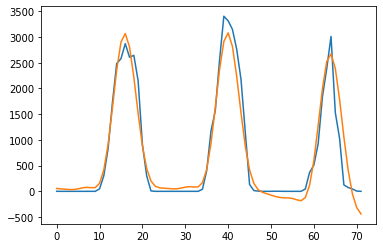

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(test.y)),test.y)
plt.plot(range(len(ypred.yhat)),ypred.yhat)
#na.fill

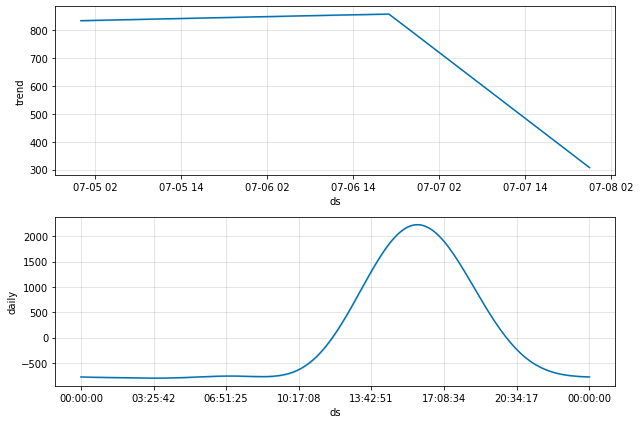

In [ ]:
cm=m.plot_components(ypred)

In [ ]:
#ypred.set_index('ds')['yhat'].plot(color='pink')
#test.set_index('ds')['y'].plot(color='green')

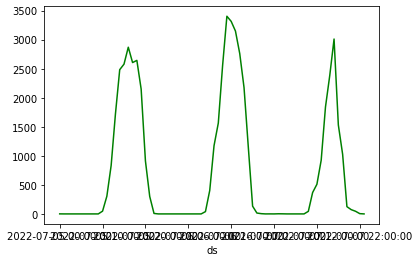

In [ ]:

test.set_index('ds')['y'].plot(color='green')

# Trasformação de dados

Geração de um agrupamento de colunas capaz de receber os valores de RAD_GLO 	TEM_INS 	UMD_INS 	

Conversão do Dataframe com os dados acima do dia 10-06-2022 para um arquivo .csv